In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import time
import random
import operator
import pickle
from copy import deepcopy

In [2]:
df = pd.read_csv('flightlist-november.csv') 

print(df)

        callsign number  icao24 registration typecode origin destination  \
0        TUP6928    NaN  424450          NaN      NaN    NaN        UUWW   
1         CSN399  CZ399  781795          NaN      NaN   YMML        KJFK   
2         ETH714    NaN  040101       ET-ASG     B788   KEWR        ESSA   
3          ZSALT    NaN  008142       ZS-ALT     B190    NaN        YPPH   
4         IRM112  W5112  7335a1       EP-MMA     A343   WMKK        LTBW   
...          ...    ...     ...          ...      ...    ...         ...   
1825010   NKS236  NK236  ac97e1       N910NK      NaN    NaN        KFLL   
1825011    AM333    NaN  7c6a57       VH-VAH     BE20   YMAV        YMEN   
1825012   N404AM    NaN  a4bb89       N404AM     B407    NaN        1IL4   
1825013   N383AK    NaN  a46679       N383AK      NaN   PAMR        PAMR   
1825014   EJA426  1I426  a51358       N426QS     GLF4   KALN        KSUS   

                         firstseen                   lastseen  \
0        2020-10-31 01

In [3]:
dfs = df

In [4]:
dfs = dfs.drop(['number', 'icao24', 'altitude_1', 'altitude_2'], axis=1)

In [5]:
dfs = dfs.dropna(subset=['registration', 'typecode', 'origin', 'destination', 'latitude_2', 'longitude_2'])

In [6]:
dfs = dfs[dfs["callsign"].str[:3]=="SIA"]

In [7]:
dfs.head()

,callsign,registration,typecode,origin,destination,firstseen,lastseen,day,latitude_1,longitude_1,latitude_2,longitude_2
34,SIA377,9V-SMG,A359,LIMC,WSSS,2020-10-31 12:31:55+00:00,2020-11-01 00:48:28+00:00,2020-11-01 00:00:00+00:00,45.623749,8.735337,1.308929,103.960644
161,SIA26,9V-SMI,A359,WSSS,EDDF,2020-10-31 16:12:38+00:00,2020-11-01 04:36:47+00:00,2020-11-01 00:00:00+00:00,1.395721,103.997048,50.040572,8.549163
167,SIA324,9V-SMT,A359,WSSS,EHAM,2020-10-31 16:16:27+00:00,2020-11-01 04:55:17+00:00,2020-11-01 00:00:00+00:00,1.389542,103.994720,52.357628,4.711487
171,SIA283,9V-SMD,A359,WSSS,NZAA,2020-10-31 16:18:49+00:00,2020-11-01 01:19:01+00:00,2020-11-01 00:00:00+00:00,1.394240,103.996298,-36.991241,174.861496
267,SIA346,9V-SMH,A359,WSSS,LSZH,2020-10-31 17:42:04+00:00,2020-11-01 06:16:57+00:00,2020-11-01 00:00:00+00:00,1.392471,103.996251,47.478653,8.540771


In [8]:
dfs.registration.unique()
# dfs.origin.unique()

array(['9V-SMG', '9V-SMI', '9V-SMT', '9V-SMD', '9V-SMH', '9V-SFN',
       '9V-SMC', '9V-SFM', '9V-SMS', '9V-SFK', '9V-SML', '9V-SWQ',
       '9V-MGL', '9V-SMF', '9V-SFQ', '9V-SWE', '9V-SFI', '9V-SMO',
       '9V-SFP', '9V-SFO', '9V-SMQ', '9V-SMN', '9V-SMJ', '9V-SMM',
       '9V-SMB', '9V-SMP', '9V-SMA', '9V-SWY', '9V-SWR', '9V-SCB',
       '9V-SWP', '9V-SMK', '9V-MGI', '9V-SMR', '9V-SWM', '9V-SWH',
       '9V-SWO', '9V-MGF', '9V-SWS', '9V-SKU', '9V-SME', '9V-SWK',
       '9V-SWN'], dtype=object)

In [9]:
data = {'airport': [],
        'latitude': [],
        'longitude': []}

airports = pd.DataFrame(data)
print(airports)

Empty DataFrame
Columns: [airport, latitude, longitude]
Index: []


In [10]:
airports_data = dfs.origin.unique()
airports_another_data = dfs.destination.unique()

for i in airports_another_data:
    found = False
    for j in airports_data:
        if i == j:
            found = True
    if found == False:
        airports_data = np.append(airports_data, i)

In [11]:
print(airports_data)

['LIMC' 'WSSS' 'OMSJ' 'EGLL' 'YSSY' 'YMML' 'NZAA' 'KORD' 'WBSB' 'VOMM'
 'KDFW' 'EHAM' 'VHHH' 'EDDF' 'FAOR' 'YBBN' 'PANC' 'EBMB' 'WMKK' 'KLAX'
 'LSZH' 'NZCH' 'VOBL' 'ZUCK' 'VABB' 'LFPG' 'EKCH' 'VIDP' 'FARA' 'EBBR'
 'YPPH' 'LEBL' 'WSAC' 'VGZR' 'YSCB' 'RJAK' 'FAGM' 'LTBW' 'YTWB' 'YRED'
 'TS53' 'YPWH' 'RJAA' 'LTBA' 'FABB' 'VGTJ' '6AK5' 'WIDD']


In [12]:
for i in airports_data:
    if (np.isnan(dfs[dfs["origin"]==i]["latitude_1"].median())):
        latitude = dfs[dfs["destination"]==i]["latitude_2"].median()
        longitude = dfs[dfs["destination"]==i]["longitude_2"].median()
        
    elif (np.isnan(dfs[dfs["destination"]==i]["latitude_2"].median())):
        latitude = dfs[dfs["origin"]==i]["latitude_1"].median()
        longitude = dfs[dfs["origin"]==i]["longitude_1"].median()
        
    else:
        latitude = (dfs[dfs["origin"]==i]["latitude_1"].median() + dfs[dfs["destination"]==i]["latitude_2"].median())/2
        longitude = (dfs[dfs["origin"]==i]["longitude_1"].median() + dfs[dfs["destination"]==i]["longitude_2"].median())/2
        
    airport = {'airport': i, 'latitude': latitude, 'longitude': longitude}
    airports = airports.append(airport, ignore_index=True)

print(airports)

   airport   latitude   longitude
0     LIMC  45.622997    8.729880
1     WSSS   1.349354  103.991831
2     OMSJ  25.333187   55.513881
3     EGLL  51.464928   -0.451351
4     YSSY -33.937398  151.173686
5     YMML -37.659397  144.836085
6     NZAA -37.007307  174.802684
7     KORD  41.967407  -87.905482
8     WBSB   4.943314  114.927863
9     VOMM  12.988395   80.164536
10    KDFW  32.904827  -97.050797
11    EHAM  52.329506    4.733640
12    VHHH  22.306459  113.907723
13    EDDF  50.045047    8.569396
14    FAOR -26.110302   28.248013
15    YBBN -27.383320  153.122108
16    PANC  61.179126 -150.017751
17    EBMB  50.909637    4.492666
18    WMKK   2.714566  101.717297
19    KLAX  33.936884 -118.397799
20    LSZH  47.467043    8.551562
21    NZCH -43.486825  172.534596
22    VOBL  13.189594   77.703107
23    ZUCK  29.778076  106.693145
24    VABB  19.088734   72.868544
25    LFPG  48.996591    2.563600
26    EKCH  55.612789   12.641687
27    VIDP  28.559853   77.113512
28    FARA -26

In [13]:
e_asia = ["VOMM", "VHHH", "VOBL", "ZUCK", "VABB", "VIDP", "VGZR", "RJAK", "RJAA", "VGTJ"]
americas = ["KORD", "KDFW", "PANC", "KLAX", "TS53", "6AK5"]
europe = ["LIMC", "EGLL", "EHAM", "EDDF", "EBMB", "LSZH", "LFPG", "EKCH", "FARA", "EBBR", "LEBL"]
sw_pasific = ["WSSS", "YSSY", "YMML", "NZAA", "WBSB", "YBBN", "WMKK", "NZCH", "YPPH", "WSAC", "YSCB", "YTWB", "YRED", "YPWH", "WIDD"]
w_asia_africa = ["OMSJ", "FAOR", "FAGM", "LTBW", "LTBA", "FABB"]

In [14]:
region = []
load_rate = []
for i in range(len(airports)):
    for j in range(len(e_asia)):
        if(airports["airport"].iloc[i]==e_asia[j]):
            region.append("East Asia")
            load_rate.append(0.128)
            break
    for k in range(len(americas)):
        if(airports["airport"].iloc[i]==americas[k]):
            region.append("Americas")
            load_rate.append(0.113)
            break
    for l in range(len(europe)):
        if(airports["airport"].iloc[i]==europe[l]):
            region.append("Europe")
            load_rate.append(0.133)
            break
    for m in range(len(sw_pasific)):
        if(airports["airport"].iloc[i]==sw_pasific[m]):
            region.append("South West Pacific")
            load_rate.append(0.171)
            break
    for n in range(len(w_asia_africa)):
        if(airports["airport"].iloc[i]==w_asia_africa[n]):
            region.append("West Asia and Africa")
            load_rate.append(0.140)
            break
            
print(region)

['Europe', 'South West Pacific', 'West Asia and Africa', 'Europe', 'South West Pacific', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'Americas', 'Europe', 'East Asia', 'Europe', 'West Asia and Africa', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'Americas', 'Europe', 'South West Pacific', 'East Asia', 'East Asia', 'East Asia', 'Europe', 'Europe', 'East Asia', 'Europe', 'Europe', 'South West Pacific', 'Europe', 'South West Pacific', 'East Asia', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'South West Pacific', 'South West Pacific', 'Americas', 'South West Pacific', 'East Asia', 'West Asia and Africa', 'West Asia and Africa', 'East Asia', 'Americas', 'South West Pacific']


In [15]:
airports['region'] = region
airports['load_rate'] = load_rate
print(airports)

   airport   latitude   longitude                region  load_rate
0     LIMC  45.622997    8.729880                Europe      0.133
1     WSSS   1.349354  103.991831    South West Pacific      0.171
2     OMSJ  25.333187   55.513881  West Asia and Africa      0.140
3     EGLL  51.464928   -0.451351                Europe      0.133
4     YSSY -33.937398  151.173686    South West Pacific      0.171
5     YMML -37.659397  144.836085    South West Pacific      0.171
6     NZAA -37.007307  174.802684    South West Pacific      0.171
7     KORD  41.967407  -87.905482              Americas      0.113
8     WBSB   4.943314  114.927863    South West Pacific      0.171
9     VOMM  12.988395   80.164536             East Asia      0.128
10    KDFW  32.904827  -97.050797              Americas      0.113
11    EHAM  52.329506    4.733640                Europe      0.133
12    VHHH  22.306459  113.907723             East Asia      0.128
13    EDDF  50.045047    8.569396                Europe      0

In [16]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):

      R = 6378.1 #earth radius in km

      dLat = radians(lat2 - lat1)
      dLon = radians(lon2 - lon1)
      lat1 = radians(lat1)
      lat2 = radians(lat2)

      a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
      c = 2*asin(sqrt(a))

      return R * c

In [17]:
airport_dist = []

# print(len(airports))
# print(airports["latitude"].iloc[1])
for i in range(len(airports)):
    row = []
    for j in range(len(airports)):
        dist = haversine(airports["latitude"].iloc[i], airports["longitude"].iloc[i], airports["latitude"].iloc[j], airports["longitude"].iloc[j])
        row.append(dist)
    airport_dist.append(row)
    
print(airport_dist)
    

[[0.0, 10320.430258215578, 4717.841781312695, 937.1660268519785, 16609.560128529316, 16328.954466590929, 18532.59680591183, 7269.067818856925, 10868.089507810684, 7548.95074633125, 8547.656137571441, 801.3169185796232, 9367.722728633229, 492.40317589072635, 8226.20896899483, 16305.37145127493, 7994.969157835845, 666.7552359065804, 10035.00646673157, 9707.300556374426, 205.7303869886589, 18733.26757149964, 7342.358008596109, 8269.138067898637, 6515.603799301376, 597.7053144643955, 1145.392331724757, 6165.855188281992, 8219.648382286154, 665.8771017492281, 13763.71195323607, 714.7633108335267, 10321.464585191243, 7525.8491042544, 16538.803322184736, 9739.086961262197, 8236.528918768698, 1684.8073009086406, 16240.840339895418, 16299.853550010886, 8549.282279244859, 16231.958278267468, 9772.276447147076, 1706.5289191728648, 8237.618885773374, 7530.724450895547, 7997.137643355394, 10343.682712043537], [10320.430258215578, 0.0, 5841.7632385838115, 10894.76051264912, 6299.836779033911, 6038.4

In [18]:
dfs['day'].value_counts()

2020-11-28 00:00:00+00:00    40
2020-11-25 00:00:00+00:00    38
2020-11-15 00:00:00+00:00    38
2020-11-21 00:00:00+00:00    37
2020-11-29 00:00:00+00:00    37
2020-11-18 00:00:00+00:00    37
2020-11-16 00:00:00+00:00    37
2020-11-22 00:00:00+00:00    37
2020-11-23 00:00:00+00:00    36
2020-11-20 00:00:00+00:00    36
2020-11-04 00:00:00+00:00    35
2020-11-14 00:00:00+00:00    35
2020-11-09 00:00:00+00:00    35
2020-11-01 00:00:00+00:00    34
2020-11-13 00:00:00+00:00    34
2020-11-19 00:00:00+00:00    34
2020-11-11 00:00:00+00:00    34
2020-11-30 00:00:00+00:00    34
2020-11-07 00:00:00+00:00    33
2020-11-02 00:00:00+00:00    33
2020-11-27 00:00:00+00:00    33
2020-11-26 00:00:00+00:00    33
2020-11-08 00:00:00+00:00    33
2020-11-06 00:00:00+00:00    32
2020-11-12 00:00:00+00:00    32
2020-11-05 00:00:00+00:00    32
2020-11-17 00:00:00+00:00    30
2020-11-10 00:00:00+00:00    28
2020-11-03 00:00:00+00:00    27
2020-11-24 00:00:00+00:00    26
Name: day, dtype: int64

In [19]:
# dfs[dfs["day"].isin({day, day_after})]

In [20]:
day = "2020-11-21 00:00:00+00:00"
# day_after = "2020-11-30 00:00:00+00:00"
day_after = "2020-11-30 00:00:00+00:00"
day_before = "2020-11-20 00:00:00+00:00"
# dfx = dfs[dfs["day"]==day]
# dfx = dfs[dfs["day"].isin({day, day_after})]
# dfx = dfs[dfs["day"].isin({day, day_after})]
dfx = dfs[(dfs["day"] >= day) & (dfs["day"] <= day_after)]
dfy = dfs[dfs["day"]<day]
dfx = dfx[:200]

In [21]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
...          ...          ...      ...    ...         ...   
1565057  SIA7987       9V-SFO     B744   KLAX        EBBR   
1565934   SIA323       9V-SMC     A359   EHAM        WSSS   
1566792   SIA345       9V-SMN     A359   LSZH        WSSS   
1567348   SIA335       9V-SMR     A359   LFPG        WSSS   
1567477    SIA25       9V-SMP     A359   EDDF        WSSS   

                         firstseen                   lastseen  \
1208410  2020-11-20 16:06:59+00:00  2020-11-21 05:40:59+00:00   
1208521  2020-11-20 16:08:35+00:00  2020-11-21 05:29:37+00:00   
1208877  2020-11-20 16:13:20+00:00  2020-11-21 05:09:18+00:00   
1211170

In [22]:
data = {'airplane': [],
        'type': [],
        'curr_loc': [],
        'last_seen': [],
        'capacity': [],
        'fixed_cost': [],
        'min_cost': [],
        'idle_cost': []}

airplanes = pd.DataFrame(data)
print(airplanes)

Empty DataFrame
Columns: [airplane, type, curr_loc, last_seen, capacity, fixed_cost, min_cost, idle_cost]
Index: []


In [23]:
airplanes_data = dfs.registration.unique()
print(airplanes_data)

['9V-SMG' '9V-SMI' '9V-SMT' '9V-SMD' '9V-SMH' '9V-SFN' '9V-SMC' '9V-SFM'
 '9V-SMS' '9V-SFK' '9V-SML' '9V-SWQ' '9V-MGL' '9V-SMF' '9V-SFQ' '9V-SWE'
 '9V-SFI' '9V-SMO' '9V-SFP' '9V-SFO' '9V-SMQ' '9V-SMN' '9V-SMJ' '9V-SMM'
 '9V-SMB' '9V-SMP' '9V-SMA' '9V-SWY' '9V-SWR' '9V-SCB' '9V-SWP' '9V-SMK'
 '9V-MGI' '9V-SMR' '9V-SWM' '9V-SWH' '9V-SWO' '9V-MGF' '9V-SWS' '9V-SKU'
 '9V-SME' '9V-SWK' '9V-SWN']


In [24]:
airplanes_capacity = []
airplanes_fixedcost = []
airplanes_idlecost = []
airplanes_minutecost = []

for i in range(len(airplanes_data)):
    for j in range(len(dfs)):
        if(dfs["registration"].iloc[j]==airplanes_data[i]):
            if(dfs["typecode"].iloc[j]=="A359"):
                capacity = 350
                min_cost = 244
                fixed_cost = 946069
                idle_min_cost = 195
            elif(dfs["typecode"].iloc[j]=="B744"):
                capacity = 416
                min_cost = 321
                fixed_cost = 851244
                idle_min_cost = 257
            elif(dfs["typecode"].iloc[j]=="B77W"):
                capacity = 264
                min_cost = 194
                fixed_cost = 969244
                idle_min_cost = 155
            elif(dfs["typecode"].iloc[j]=="B738"):
                capacity = 215
                min_cost = 116
                fixed_cost = 732745
                idle_min_cost = 92
            elif(dfs["typecode"].iloc[j]=="B78X"):
                capacity = 337
                min_cost = 187
                fixed_cost = 1001250
                idle_min_cost = 150
            elif(dfs["typecode"].iloc[j]=="A388"):
                capacity = 471
                min_cost = 433
                fixed_cost = 638418
                idle_min_cost = 347
            airplanes_capacity.append(int(capacity))
            airplanes_fixedcost.append(int(fixed_cost))
            airplanes_idlecost.append(int(idle_min_cost))
            airplanes_minutecost.append(int(min_cost))
            break

print(airplanes_capacity)

[350, 350, 350, 350, 350, 416, 350, 416, 350, 416, 350, 264, 215, 350, 416, 264, 416, 350, 416, 416, 350, 350, 350, 350, 350, 350, 350, 264, 264, 337, 264, 350, 215, 350, 264, 264, 264, 215, 264, 471, 350, 264, 264]


In [25]:
no_airplane = 0
for i in airplanes_data:
    for j in range(len(dfx)):
        if(dfx["registration"].iloc[j]==i):
            airplane = {'airplane': i,
                        'type': dfx["typecode"].iloc[j],
                        'curr_loc': dfx["origin"].iloc[j],
                        'last_seen': dfx["firstseen"].iloc[j],
                        'capacity': airplanes_capacity[no_airplane],
                        'fixed_cost': airplanes_fixedcost[no_airplane],
                        'min_cost': airplanes_minutecost[no_airplane],
                        'idle_cost': airplanes_idlecost[no_airplane]}
            
            airplanes = airplanes.append(airplane, ignore_index=True)
            break
        elif((j==(len(dfx)-1)) and (dfx["registration"].iloc[j]!=i)):
            for k in range(len(dfy)):
                if((k!=0) and (dfy["registration"].iloc[-k]==i)):
                    airplane = {'airplane': i,
                                'type': dfy["typecode"].iloc[-k],
                                'curr_loc': dfy["destination"].iloc[-k],
                                'last_seen': dfy["firstseen"].iloc[-k],
                                'capacity': airplanes_capacity[no_airplane],
                                'fixed_cost': airplanes_fixedcost[no_airplane],
                                'min_cost': airplanes_minutecost[no_airplane],
                                'idle_cost': airplanes_idlecost[no_airplane]}
                    
                    airplanes = airplanes.append(airplane, ignore_index=True)
                    break
                elif((k==(len(dfy)-1)) and (dfy["registration"].iloc[-k]!=i)):
                    for l in range(len(dfs)):
                        if((l!=0) and (dfs["registration"].iloc[-l]==i)):
                            airplane = {'airplane': i,
                                        'type': dfs["typecode"].iloc[-l],
                                        'curr_loc': "WSSS",
                                        'last_seen': day_before,
                                        'capacity': airplanes_capacity[no_airplane],
                                        'fixed_cost': airplanes_fixedcost[no_airplane],
                                        'min_cost': airplanes_minutecost[no_airplane],
                                        'idle_cost': airplanes_idlecost[no_airplane]}
                            airplanes = airplanes.append(airplane, ignore_index=True)
                            break
                            
    no_airplane = no_airplane + 1
    
print(airplanes)

   airplane  type curr_loc                  last_seen  capacity  fixed_cost  \
0    9V-SMG  A359     LSZH  2020-11-21 13:12:36+00:00     350.0    946069.0   
1    9V-SMI  A359     WSSS  2020-11-20 17:54:12+00:00     350.0    946069.0   
2    9V-SMT  A359     WSSS  2020-11-22 02:15:05+00:00     350.0    946069.0   
3    9V-SMD  A359     NZCH  2020-11-20 22:51:25+00:00     350.0    946069.0   
4    9V-SMH  A359     LFPG  2020-11-21 10:03:18+00:00     350.0    946069.0   
5    9V-SFN  B744     WSSS  2020-11-21 03:07:03+00:00     416.0    851244.0   
6    9V-SMC  A359     WSSS  2020-11-23 00:43:50+00:00     350.0    946069.0   
7    9V-SFM  B744     WSSS  2020-11-20 22:21:21+00:00     416.0    851244.0   
8    9V-SMS  A359     WSSS  2020-11-21 16:05:15+00:00     350.0    946069.0   
9    9V-SFK  B744     WSSS  2020-11-22 06:01:20+00:00     416.0    851244.0   
10   9V-SML  A359     WSSS  2020-11-21 01:12:22+00:00     350.0    946069.0   
11   9V-SWQ  B77W     WSSS  2020-11-18 17:03:08+00:0

In [26]:
max_delay = 180 #minute
min_safe = 30 #minute
max_arrival = max_delay - min_safe

def createSchedule():
    created = False
    while(created==False):
        airplanes_temp = airplanes.copy()
        schedule = []
        wakeup = time.time() + 10
        for i in range(len(dfx)):
            flight = [i]

            found = False
            while (found == False):
                id_airplane = random.randint(0, len(airplanes)-1)
                if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i])+ datetime.timedelta(minutes=max_arrival)) and airplanes_temp["curr_loc"].iloc[id_airplane]==dfx["origin"].iloc[i]):
                    found = True
                else:
                    if (time.time() > wakeup):
                        break       

            airplanes_temp["curr_loc"].iloc[id_airplane]=dfx["destination"].iloc[i]

            if (pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) < (pd.to_datetime(dfx["firstseen"].iloc[i]) - datetime.timedelta(minutes=min_safe))):
                departure = pd.to_datetime(dfx["firstseen"].iloc[i])
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival
            else:
                departure = pd.to_datetime(airplanes_temp["last_seen"].iloc[id_airplane]) + datetime.timedelta(minutes=min_safe)
                arrival = departure + (pd.to_datetime(dfx["lastseen"].iloc[i])-pd.to_datetime(dfx["firstseen"].iloc[i]))
                airplanes_temp["last_seen"].iloc[id_airplane]=arrival

            for j in range(len(airports)):
                if(airports["airport"].iloc[j]==dfx["destination"].iloc[i]):
                    load_rate = airports["load_rate"].iloc[j]
                    break     

            passenger = round(airplanes_temp["capacity"].iloc[id_airplane] * load_rate)

            flight.extend([id_airplane, departure, arrival, passenger, load_rate])
            schedule.append(flight)
        if(len(dfx)==len(schedule)):
            created = True
    
    return schedule

In [27]:
def createOriginalSchedule():
    schedule = []
    for i in range(len(dfx)):
        flight=[i]
        for j in range(len(airplanes)):
            if(airplanes["airplane"].iloc[j]==dfx["registration"].iloc[i]):
                break
        flight.append(j)
        flight.append(pd.to_datetime(dfx["firstseen"].iloc[i]))
        flight.append(pd.to_datetime(dfx["lastseen"].iloc[i]))
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                break
        flight.append(round(airplanes["capacity"].iloc[j] * airports["load_rate"].iloc[k]))
        flight.append(airports["load_rate"].iloc[k])
        
        schedule.append(flight)
        
    return schedule
        

In [28]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countOriginalFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
#     
#     fitness_val = (((passenger-0)/(4270-0)*1000)-((cost-0)/(50898241-0)*1000))
    fitness_val = cost-passenger
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    fitness.append(plane_count)
    
    return fitness

In [29]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countAirplaneFitness(schedule, airplane_id):
    fitness = []
    cost = 0
    passenger = 0
    plane_used = False
    idle_sec = 0
    idle_min_cost = 0
    fixed_cost = 0
    id = airplane_id
    for i in range(len(schedule)):
        if(schedule[i][1]==id):
            if(airplanes["type"].iloc[id]=="A359"):
                min_cost = 244
            elif(airplanes["type"].iloc[id]=="B744"):
                min_cost = 321
            elif(airplanes["type"].iloc[id]=="B77W"):
                min_cost = 194
            elif(airplanes["type"].iloc[id]=="B738"):
                min_cost = 116
            elif(airplanes["type"].iloc[id]=="B78X"):
                min_cost = 187
            elif(airplanes["type"].iloc[id]=="A388"):
                min_cost = 433
            cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
            passenger = passenger + schedule[i][4]
            
            for k in range(len(airports)):
                if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                    origin_id = k
                if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                    destination_id = k

            cost = cost + airport_dist[origin_id][destination_id]
        
    first_flight = pd.to_datetime(airplanes["last_seen"].iloc[id])
    last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])

    for k in range(len(schedule)):
        if(schedule[k][1]==id):
            if(plane_used==False):
                plane_used = True
                lastflight_pos = k
                idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
            else:
                idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                lastflight_pos = k

    if(plane_used==False):
        idle_sec = idle_sec + (last_flight - first_flight).seconds
        fixed_cost = 0
    else:
        idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
        if(airplanes["type"].iloc[id]=="A359"):
            fixed_cost = 946069
        elif(airplanes["type"].iloc[id]=="B744"):
            fixed_cost = 851244
        elif(airplanes["type"].iloc[id]=="B77W"):
            fixed_cost = 969244
        elif(airplanes["type"].iloc[id]=="B738"):
            fixed_cost = 732745
        elif(airplanes["type"].iloc[id]=="B78X"):
            fixed_cost = 1001250
        elif(airplanes["type"].iloc[id]=="A388"):
            fixed_cost = 638418

    if(airplanes["type"].iloc[id]=="A359"):
        idle_min_cost = 195
    elif(airplanes["type"].iloc[id]=="B744"):
        idle_min_cost = 257
    elif(airplanes["type"].iloc[id]=="B77W"):
        idle_min_cost = 155
    elif(airplanes["type"].iloc[id]=="B738"):
        idle_min_cost = 92
    elif(airplanes["type"].iloc[id]=="B78X"):
        idle_min_cost = 150
    elif(airplanes["type"].iloc[id]=="A388"):
        idle_min_cost = 347

    cost = cost + round(idle_sec/60)*idle_min_cost
    cost = cost + fixed_cost
    
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
    fitness_val = (((passenger-0)/(originalFitness[1]-0)*3000)-((cost-0)/(originalFitness[2]-0)*600))
#     fitness_val = cost-passenger
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    
    return fitness

In [30]:
# normalisasi passengger & cost
# cost = fixed cost & minute cost
def countFitness(schedule):
    fitness = []
    cost = 0
    passenger = 0
    plane_count = 0
    for i in range(len(schedule)):
        if(airplanes["type"].iloc[schedule[i][1]]=="A359"):
            min_cost = 244
        elif(airplanes["type"].iloc[schedule[i][1]]=="B744"):
            min_cost = 321
        elif(airplanes["type"].iloc[schedule[i][1]]=="B77W"):
            min_cost = 194
        elif(airplanes["type"].iloc[schedule[i][1]]=="B738"):
            min_cost = 116
        elif(airplanes["type"].iloc[schedule[i][1]]=="B78X"):
            min_cost = 187
        elif(airplanes["type"].iloc[schedule[i][1]]=="A388"):
            min_cost = 433
        cost = cost + round((schedule[i][3]-schedule[i][2]).seconds/60)*min_cost
        passenger = passenger + schedule[i][4]
        
        for k in range(len(airports)):
            if(airports["airport"].iloc[k]==dfx["origin"].iloc[i]):
                origin_id = k
            if(airports["airport"].iloc[k]==dfx["destination"].iloc[i]):
                destination_id = k
        
        cost = cost + airport_dist[origin_id][destination_id]
        
    for j in range(len(airplanes)):
        plane_used = False
        idle_sec = 0
        fixed_cost = 0
        first_flight = pd.to_datetime(airplanes["last_seen"].iloc[j])
        last_flight = pd.to_datetime(dfx["lastseen"].iloc[len(dfx)-1])
        
        for k in range(len(schedule)):
            if(schedule[k][1]==j):
                if(plane_used==False):
                    plane_used = True
                    plane_count = plane_count + 1
                    lastflight_pos = k
                    idle_sec = idle_sec + (schedule[k][2] - first_flight).seconds
                else:
                    idle_sec = idle_sec + (schedule[k][2] - schedule[lastflight_pos][2]).seconds
                    lastflight_pos = k
                    
        if(plane_used==False):
            idle_sec = idle_sec + (last_flight - first_flight).seconds
            fixed_cost = 0
        else:
            idle_sec = idle_sec + (last_flight - schedule[lastflight_pos][3]).seconds
            if(airplanes["type"].iloc[j]=="A359"):
                fixed_cost = 946069
            elif(airplanes["type"].iloc[j]=="B744"):
                fixed_cost = 851244
            elif(airplanes["type"].iloc[j]=="B77W"):
                fixed_cost = 969244
            elif(airplanes["type"].iloc[j]=="B738"):
                fixed_cost = 732745
            elif(airplanes["type"].iloc[j]=="B78X"):
                fixed_cost = 1001250
            elif(airplanes["type"].iloc[j]=="A388"):
                fixed_cost = 638418
        
        if(airplanes["type"].iloc[j]=="A359"):
            idle_min_cost = 195
        elif(airplanes["type"].iloc[j]=="B744"):
            idle_min_cost = 257
        elif(airplanes["type"].iloc[j]=="B77W"):
            idle_min_cost = 155
        elif(airplanes["type"].iloc[j]=="B738"):
            idle_min_cost = 92
        elif(airplanes["type"].iloc[j]=="B78X"):
            idle_min_cost = 150
        elif(airplanes["type"].iloc[j]=="A388"):
            idle_min_cost = 347
        
        cost = cost + round(idle_sec/60)*idle_min_cost
        cost = cost + fixed_cost
        
    originalFitness = countOriginalFitness(createOriginalSchedule())
    
    fitness_val = (((passenger-0)/(originalFitness[1]-0)*3000)-((cost-0)/(originalFitness[2]-0)*600))
#     fitness_val = cost-passenger
    fitness.append(fitness_val)
    fitness.append(passenger)
    fitness.append(cost)
    fitness.append(plane_count)
    
    return fitness

In [31]:
def elite(population):
    curr_elite = 0
    for i in range(len(population)):
        if(population[i][0] > population[curr_elite][0]):
            curr_elite = i
    return curr_elite

In [32]:
def roulleteWheel(population):
    sump = 0
    sumpart = 0
    worst = 0
    
    for k in range(len(population)):
#         print("worst", population[worst][0])
        if(population[k][0] < population[worst][0]):
            worst = k 
    
    for i in range(len(population)):
        if(population[worst][0] < 0):
            sump = sump + population[i][0] - population[worst][0]
        else:
            sump = sump + population[i][0]
#         print("sump", sump)
    
    rand = random.uniform(0, sump)
#     print("Random", rand)
    
    for j in range(len(population)):
        if(population[worst][0] < 0):
            sumpart = sumpart + population[j][0] - population[worst][0]
        else:
            sumpart = sumpart + population[j][0]
#         print("sumpart", sumpart)
        if(sumpart > rand):
            break
    
    return j

In [33]:
def swapPlane(flight1, flight2):
    newflight1 = []
    newflight2 = []
    result = []

#     print(flight1[1])
#     print(flight2[1])
    
    newflight1.append(flight1[0])
    newflight2.append(flight2[0])
    
    newflight1.append(flight2[1])
    newflight2.append(flight1[1])
    
#     print(newflight1[1])
#     print(newflight2[1])
    
    newflight1.append(flight2[2])
    newflight2.append(flight1[2])

    newflight1.append(flight1[2] + (flight2[3] - flight2[2]))
    newflight2.append(flight2[2] + (flight1[3] - flight1[2]))
    
    newflight1.append(round(airplanes["capacity"].iloc[flight1[1]] * flight2[5]))
    newflight2.append(round(airplanes["capacity"].iloc[flight2[1]] * flight1[5]))
    
    newflight1.append(flight1[5])
    newflight2.append(flight2[5])
    
    result = [newflight1, newflight2]
    return result

In [34]:
def rao3(solution, rand_solution, best_solution, worst_solution):  
    rao3_done = False
    while (rao3_done == False):
#         print(1)
        rand_flight = random.randint(0, len(solution)-1)        
        airplanelist = []
        for i in range(len(airplanes)):
            airplane = [i, airplanes["curr_loc"].iloc[i], airplanes["last_seen"].iloc[i], airplanes["capacity"].iloc[i], airplanes["fixed_cost"].iloc[i], airplanes["min_cost"].iloc[i], airplanes["idle_cost"].iloc[i], 0]
            airplanelist.append(airplane)
        for j in range(rand_flight):
            airplanelist[solution[j][1]][1] = dfx["destination"].iloc[j]
            airplanelist[solution[j][1]][2] = solution[j][3]

        available_airplanes = []
        for airplane in airplanelist:
            if (airplane[0] != solution[rand_flight][1] and airplane[1] == dfx["origin"].iloc[rand_flight] and pd.to_datetime(airplane[2]) < (pd.to_datetime(dfx["firstseen"].iloc[rand_flight]) + datetime.timedelta(minutes=min_safe))):
                available_airplanes.append(airplane)
        
#         print(2)        
        if(len(available_airplanes) >= 3):
            rao3_solution = []
            variables = ["capacity", "fixed_cost", "min_cost", "idle_cost"]
            for variable in variables:
                xsolution = airplanes[variable].iloc[solution[rand_flight][1]]
                xrandsolution = airplanes[variable].iloc[rand_solution[rand_flight][1]]
                xbests = airplanes[variable].iloc[best_solution[rand_flight][1]]
                xworst = airplanes[variable].iloc[worst_solution[rand_flight][1]]
                

                if(countFitness(solution)[0] > countFitness(rand_solution)[0]):
                    or1 = xsolution
                    or2 = xrandsolution
                else:
                    or1 = xrandsolution
                    or2 = xsolution
                    
                xsolution = xsolution + (random.random()*(xbests- abs(xworst))) + (random.random()*(abs(or1) - abs(or2)))
                rao3_solution.append(xsolution)
                
#             print(3)
            for k in range(len(rao3_solution)):
                max_val = rao3_solution[k]*2
                for airplane in available_airplanes:
                    val_diff = abs(rao3_solution[k] - airplane[k+3])                    
                    rate = ((max_val - val_diff) / (max_val - 0))*0.25
                    
                    airplane[-1] = airplane[-1] +  rate
            
#             print(4)
            new_solution = []
            available_airplanes = sorted(available_airplanes,key=lambda l:l[7], reverse=True)
            airplane1 = solution[rand_flight][1]
            airplane2 = available_airplanes[0][0]
            last_pos1 = -1
            last_pos2 = -1
            for l in range(len(solution)):
                if(l < rand_flight):
                    new_solution.append(solution[l])
                    if(solution[l][1]==airplane1):
                        last_pos1 = l
                    elif(solution[l][1]==airplane2):
                        last_pos2 = l   
                else:                                        
                    newflight = solution[l]
                    newflight[4] = round(airplanes["capacity"].iloc[newflight[1]] * newflight[5])
                    if(solution[l][1]==airplane1):
                        newflight[1] = airplane2                        
                        if(last_pos2 > -1):
                            if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)):
                                newflight[2] = new_solution[last_pos2][3] + datetime.timedelta(minutes=min_safe)
                                newflight[3] = new_solution[last_pos2][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                        last_pos2 = l        
                    elif(solution[l][1]==airplane2):
                        newflight[1] = airplane1                        
                        if(last_pos1 > -1):
                            if(pd.to_datetime(dfx["firstseen"].iloc[l]) < new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)):
                                newflight[2] = new_solution[last_pos1][3] + datetime.timedelta(minutes=min_safe)
                                newflight[3] = new_solution[last_pos1][3] + (solution[l][3]-solution[l][2]) + datetime.timedelta(minutes=min_safe)
                        last_pos1 = l 
                    new_solution.append(newflight)                    
#             print(5)
            rao3_done = True

    return new_solution 

In [35]:
print(dfx)

        callsign registration typecode origin destination  \
1208410   SIA322       9V-SMQ     A359   WSSS        EGLL   
1208521   SIA324       9V-SMM     A359   WSSS        EHAM   
1208877    SIA26       9V-SMB     A359   WSSS        EDDF   
1211170   SIA352       9V-SMN     A359   WSSS        EKCH   
1215881   SIA478       9V-SMA     A359   WSSS        FABB   
...          ...          ...      ...    ...         ...   
1565057  SIA7987       9V-SFO     B744   KLAX        EBBR   
1565934   SIA323       9V-SMC     A359   EHAM        WSSS   
1566792   SIA345       9V-SMN     A359   LSZH        WSSS   
1567348   SIA335       9V-SMR     A359   LFPG        WSSS   
1567477    SIA25       9V-SMP     A359   EDDF        WSSS   

                         firstseen                   lastseen  \
1208410  2020-11-20 16:06:59+00:00  2020-11-21 05:40:59+00:00   
1208521  2020-11-20 16:08:35+00:00  2020-11-21 05:29:37+00:00   
1208877  2020-11-20 16:13:20+00:00  2020-11-21 05:09:18+00:00   
1211170

In [36]:
test = createSchedule()

c:\users\user\opencv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
print(test)

[[0, 21, Timestamp('2020-11-20 17:14:59+0000', tz='UTC'), Timestamp('2020-11-21 06:48:59+0000', tz='UTC'), 47, 0.133], [1, 39, Timestamp('2020-11-20 16:08:35+0000', tz='UTC'), Timestamp('2020-11-21 05:29:37+0000', tz='UTC'), 63, 0.133], [2, 41, Timestamp('2020-11-20 16:13:20+0000', tz='UTC'), Timestamp('2020-11-21 05:09:18+0000', tz='UTC'), 35, 0.133], [3, 20, Timestamp('2020-11-20 16:44:59+0000', tz='UTC'), Timestamp('2020-11-21 05:14:59+0000', tz='UTC'), 47, 0.133], [4, 15, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 37, 0.14], [5, 1, Timestamp('2020-11-20 18:24:12+0000', tz='UTC'), Timestamp('2020-11-21 01:27:39+0000', tz='UTC'), 60, 0.171], [6, 12, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 37, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'), 

In [38]:
def era():
    print("Starting...")
    p = 40
    s = 0.5
    a = 0.5
    b = 0.9
    iteration = 100
    y_plot_list = []
    x_plot_list = []
    xbest = []
    xworst = []
    bestsolution = []
    f1 = 0
    f2 = 0
    f3 = 0
    
    print("Creating Solution...")
       
    with open('solution/solution_200-1', 'rb') as fp:
        initial_solutions1 = pickle.load(fp)
    with open('solution/solution_200-2', 'rb') as fp:
        initial_solutions2 = pickle.load(fp)
    initial_solutions =  initial_solutions1 + initial_solutions2
    
#     solutions = deepcopy(initial_solutions)
    solutions = []
    
    for i in range(len(initial_solutions)):
        fitness = countFitness(initial_solutions[i])[0]
        sol_fit = [initial_solutions[i], fitness]
        solutions.append(sol_fit)
        
    
    for i in range(iteration):
        print("Iterasi ke-", i)
        for solution in solutions:
            solution[1] = countFitness(solution[0])[0]
            
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)              
        
        if(i==0):
            f2 = countFitness(solutions[0][0])[0]
            f3 = countFitness(solutions[0][0])[0]
            xbest = deepcopy(solutions[0])
            xworst = deepcopy(solutions[-1])
        else:
            f3 = f2
            f2 = f1
            if(solutions[0][1] > xbest[1]):
                xbest = deepcopy(solutions[0])
            if(solutions[-1][1] > xworst[1]):
                xworst = deepcopy(solutions[-1])
        
        print("Rao3 solution...")
        for j in range(len(solutions)):
            
            random_indv = random.randint(0, len(solutions)-1)
            while solutions[j]==solutions[random_indv]:
                random_indv = random.randint(0, len(solutions)-1)
            
#             print(countFitness(indv_solution[0]))
#             print(countFitness(solutions[random_indv][0]))
#             print(countFitness(xbest[0]))
#             print(countFitness(xworst[0]))
            solutions[j][0] = rao3(solutions[j][0], solutions[random_indv][0], xbest[0], xworst[0])
            solutions[j][1] = countFitness(solutions[j][0])[0]
        
        solutions = sorted(solutions,key=lambda l:l[1], reverse=True)
        
        bestsolution = solutions[0]
              
        if(solutions[0][1] > xbest[1]):
            xbest = deepcopy(solutions[0])
       
        f1 = countFitness(xbest[0])[0]
        diff1 = abs(f1-f2)/f1
        diff2 = abs(f2-f3)/f2       
        
#         if(diff1 > 0 and diff2 > 0):
#             a = a * 0.97
#             b = b * 0.97
#         elif(diff1 == 0 and diff2 == 0):
#             a = a * 1.03
#             b = b * 1.03
        
        print("a:", a)
        print("b:", b)
        print("Elite Solution:", countFitness(xbest[0]))
        print("High-Quality Solution")
        for j in range(10):
            print("Solution: ", countFitness(solutions[j][0]))
        
        if(i==0):
            values = [countFitness(xbest[0])[0]]
            y_plot_list.append(values)
        else:
            y_plot_list[0].append(countFitness(xbest[0])[0])
        
        for j in range(9):
            if(i==0):
                values = [countFitness(solutions[j+1][0])[0]]
                y_plot_list.append(values)
            else:
                if(countFitness(solutions[j+1][0])[0] > y_plot_list[j+1][i-1]):
                    y_plot_list[j+1].append(countFitness(solutions[j+1][0])[0])
                else:
                    y_plot_list[j+1].append(y_plot_list[j+1][i-1])    
        x_plot_list.append(i)    
            
            
    return xbest[0], x_plot_list, y_plot_list

In [39]:
start_time = time.time()
result, x_plot_list, y_plot_list = era()
end_time = time.time()

Starting...
Creating Solution...
Iterasi ke- 0
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1001.6921729419882, 5378, 61685065.01789937, 34]
High-Quality Solution
Solution:  [1001.6921729419882, 5378, 61685065.01789937, 34]
Solution:  [991.4653850442794, 5332, 61399763.01789937, 35]
Solution:  [978.9987798785269, 5245, 59855926.01789937, 34]
Solution:  [967.5077930766777, 5271, 62539908.01789938, 36]
Solution:  [964.7595012229522, 5182, 59499223.01789938, 33]
Solution:  [963.6796339261937, 5216, 60971917.01789937, 35]
Solution:  [956.3498638343879, 5200, 61423727.01789937, 35]
Solution:  [953.1540348634707, 5265, 64404425.01789938, 39]
Solution:  [952.135609446952, 5235, 63392918.01789937, 37]
Solution:  [952.0054772120093, 5272, 64842916.01789938, 36]
Iterasi ke- 1
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1001.6921729419882, 5378, 61685065.01789937, 34]
High-Quality Solution
Solution:  [999.2677540636291, 5386, 62348589.01789937, 35]
Solution:  [986.1007531799416, 5319, 6168

Solution:  [997.3547044014829, 5415, 63749604.01789937, 37]
Solution:  [983.6456241032938, 5323, 62193871.01789937, 35]
Solution:  [971.8123067476977, 5334, 64347724.01789937, 38]
Solution:  [966.7747256147907, 5293, 63497842.01789938, 37]
Solution:  [963.9751652378186, 5157, 58646901.01789938, 32]
Solution:  [963.9251054541223, 5256, 62483079.01789937, 35]
Solution:  [956.730913978245, 5279, 64423427.01789938, 37]
Solution:  [955.2010052928835, 5224, 62519744.01789937, 36]
Solution:  [951.6857136006512, 5272, 64889622.01789938, 37]
Solution:  [951.6823263183865, 5234, 63420451.01789937, 37]
Iterasi ke- 12
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1006.5873154919733, 5421, 62633103.01789937, 36]
High-Quality Solution
Solution:  [995.0278637586312, 5415, 64089472.01789937, 37]
Solution:  [983.9362486650743, 5325, 62228772.01789937, 35]
Solution:  [973.3404024539263, 5334, 64124524.01789937, 38]
Solution:  [962.0026624688669, 5256, 62763879.01789937, 35]
Solution:  [959.62556409669

Solution:  [961.4073889542983, 5275, 63585660.01789938, 37]
Solution:  [959.3299003055563, 5247, 62806195.01789938, 36]
Solution:  [958.7857754251343, 5319, 65670302.01789938, 37]
Solution:  [957.7516327175795, 5280, 64313012.01789937, 37]
Solution:  [957.3493620843067, 5272, 64062366.01789938, 38]
Solution:  [955.1679483586217, 5276, 64535694.01789937, 39]
Solution:  [954.1105038192488, 5226, 62756378.01789938, 36]
Iterasi ke- 23
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1007.4879189957803, 5481, 64822082.01789937, 37]
High-Quality Solution
Solution:  [1007.4879189957803, 5481, 64822082.01789937, 37]
Solution:  [973.1296346983563, 5306, 63072398.01789938, 35]
Solution:  [969.4327126279195, 5321, 64192517.01789937, 37]
Solution:  [963.832637940556, 5311, 64623733.01789938, 36]
Solution:  [962.9734816639749, 5275, 63356910.01789937, 37]
Solution:  [957.3504232618805, 5272, 64062211.01789938, 38]
Solution:  [955.1692833884726, 5276, 64535499.01789937, 39]
Solution:  [955.1684227734

Solution:  [968.0839492428078, 5309, 63925418.01789937, 36]
Solution:  [966.892898551373, 5295, 63557932.01789938, 35]
Solution:  [966.7274704172504, 5314, 64316928.01789937, 37]
Solution:  [965.4266600806152, 5317, 64622956.01789938, 38]
Iterasi ke- 34
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1007.4879189957803, 5481, 64822082.01789937, 37]
High-Quality Solution
Solution:  [984.2894716931429, 5340, 62757310.01789938, 35]
Solution:  [981.264926973364, 5411, 65945042.01789937, 38]
Solution:  [978.263884865248, 5366, 64642993.01789938, 38]
Solution:  [976.8907302331367, 5321, 63103168.01789937, 36]
Solution:  [975.2932477111158, 5326, 63529880.01789938, 37]
Solution:  [974.8924564176057, 5364, 65058087.01789938, 38]
Solution:  [974.3943000688444, 5338, 64125289.01789937, 36]
Solution:  [972.3322097416715, 5279, 62144637.01789938, 35]
Solution:  [964.6109598386959, 5306, 64316671.01789937, 37]
Solution:  [959.1701000257331, 5295, 64685956.01789938, 36]
Iterasi ke- 35
Rao3 solution.

Solution:  [960.2762630101114, 5292, 64408359.01789938, 38]
Iterasi ke- 45
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1007.4879189957803, 5481, 64822082.01789937, 37]
High-Quality Solution
Solution:  [988.2723385460292, 5439, 66004422.01789938, 38]
Solution:  [982.9485070714538, 5309, 61754239.01789938, 35]
Solution:  [978.7899951575653, 5356, 64179393.01789938, 37]
Solution:  [969.8173353116024, 5320, 64097662.01789938, 37]
Solution:  [967.087800889199, 5298, 63645490.01789938, 36]
Solution:  [966.5495621279745, 5326, 64807019.01789938, 38]
Solution:  [961.32144480394, 5332, 65802712.01789938, 38]
Solution:  [960.699248358468, 5251, 62760884.01789937, 37]
Solution:  [959.9641715516784, 5226, 61901367.01789938, 34]
Solution:  [957.398576368013, 5302, 65215440.01789937, 38]
Iterasi ke- 46
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1007.4879189957803, 5481, 64822082.01789937, 37]
High-Quality Solution
Solution:  [987.8114697093878, 5438, 66033063.01789938, 38]
Solution:  [985.0

Solution:  [980.5345680918794, 5367, 64350003.01789938, 37]
Solution:  [980.1653392180465, 5333, 63088970.01789938, 36]
Solution:  [976.6125914729746, 5287, 61828830.01789937, 35]
Solution:  [973.6025196885837, 5370, 65478553.01789938, 38]
Solution:  [973.1865336928557, 5313, 63334815.01789938, 37]
Solution:  [972.9940713548935, 5364, 65335373.01789938, 39]
Solution:  [968.8351042077745, 5364, 65942849.01789938, 38]
Solution:  [967.6993796573674, 5307, 63904239.01789938, 36]
Solution:  [963.0112119763662, 5251, 62423189.01789938, 37]
Solution:  [958.5229035494112, 5227, 62150560.01789938, 35]
Iterasi ke- 57
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1007.4879189957803, 5481, 64822082.01789937, 37]
High-Quality Solution
Solution:  [982.4570110771348, 5367, 64069203.01789938, 37]
Solution:  [978.0303531391442, 5338, 63594192.01789938, 36]
Solution:  [978.024962793552, 5383, 65335373.01789938, 39]
Solution:  [974.8555170898496, 5370, 65295535.01789938, 38]
Solution:  [973.07920413915

Solution:  [974.1146416510971, 5374, 65558452.01789938, 39]
Solution:  [973.88521187268, 5356, 64895806.01789938, 37]
Solution:  [970.8781907940331, 5344, 64870919.01789937, 38]
Solution:  [967.8080394468368, 5368, 66247568.01789938, 39]
Solution:  [959.447241874585, 5301, 64877528.01789937, 38]
Solution:  [957.5713258537427, 5255, 63372463.01789937, 36]
Solution:  [957.3614262869501, 5282, 64447358.01789937, 39]
Iterasi ke- 68
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1007.4879189957803, 5481, 64822082.01789937, 37]
High-Quality Solution
Solution:  [982.1832873325609, 5311, 61943361.01789938, 36]
Solution:  [981.6762507264351, 5374, 64453972.01789938, 38]
Solution:  [975.4699298816244, 5362, 64896388.01789938, 37]
Solution:  [974.5357137254009, 5356, 64800791.01789937, 38]
Solution:  [973.5602234867509, 5305, 62970829.01789938, 36]
Solution:  [971.5939135960573, 5374, 65926640.01789938, 39]
Solution:  [967.4278706469041, 5298, 63595818.01789937, 36]
Solution:  [964.3292044639027

Solution:  [965.4594601996384, 5271, 62839096.01789938, 34]
Solution:  [965.3662831621963, 5310, 64361047.01789938, 38]
Solution:  [965.2067087779537, 5317, 64655083.01789938, 37]
Solution:  [963.2525857534134, 5309, 64631107.01789938, 38]
Iterasi ke- 79
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1007.4879189957803, 5481, 64822082.01789937, 37]
High-Quality Solution
Solution:  [998.4116461309392, 5435, 64368731.01789937, 37]
Solution:  [979.4156409093387, 5357, 64126684.01789938, 38]
Solution:  [975.1558949244042, 5318, 63240539.01789938, 37]
Solution:  [974.5807244690149, 5292, 62318990.01789938, 35]
Solution:  [972.4569183767769, 5256, 61236887.01789937, 35]
Solution:  [969.9300129983101, 5318, 64003853.01789937, 36]
Solution:  [968.8692974389814, 5283, 62805146.01789938, 34]
Solution:  [965.3662831621963, 5310, 64361047.01789938, 38]
Solution:  [964.8530285620766, 5317, 64706743.01789938, 37]
Solution:  [964.6713883731497, 5336, 65468107.01789938, 39]
Iterasi ke- 80
Rao3 soluti

Solution:  [971.8727649694188, 5319, 63758762.01789938, 38]
Iterasi ke- 90
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1007.4879189957803, 5481, 64822082.01789937, 37]
High-Quality Solution
Solution:  [988.0344405157698, 5373, 63486593.01789938, 37]
Solution:  [984.9965873300603, 5343, 62770052.01789937, 38]
Solution:  [979.7407991880027, 5287, 61371911.01789937, 35]
Solution:  [979.0550271816653, 5307, 62245586.01789938, 35]
Solution:  [978.8212629362266, 5390, 65489790.01789938, 38]
Solution:  [976.51682536422, 5328, 63428510.01789938, 37]
Solution:  [975.8262281611585, 5281, 61711637.01789938, 35]
Solution:  [975.1615356189373, 5325, 63510443.01789938, 35]
Solution:  [973.6807519329263, 5365, 65273749.01789938, 38]
Solution:  [971.7218185715697, 5288, 62581872.01789938, 36]
Iterasi ke- 91
Rao3 solution...
a: 0.5
b: 0.9
Elite Solution: [1007.4879189957803, 5481, 64822082.01789937, 37]
High-Quality Solution
Solution:  [984.997648507634, 5343, 62769897.01789937, 38]
Solution:  [982

In [40]:
print(result)

[[0, 20, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 47, 0.133], [1, 23, Timestamp('2020-11-20 18:24:12+0000', tz='UTC'), Timestamp('2020-11-21 07:45:14+0000', tz='UTC'), 63, 0.133], [2, 12, Timestamp('2020-11-20 16:13:20+0000', tz='UTC'), Timestamp('2020-11-21 05:09:18+0000', tz='UTC'), 63, 0.133], [3, 39, Timestamp('2020-11-20 18:27:55+0000', tz='UTC'), Timestamp('2020-11-21 06:57:55+0000', tz='UTC'), 29, 0.133], [4, 32, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 30, 0.14], [5, 18, Timestamp('2020-11-20 19:24:04+0000', tz='UTC'), Timestamp('2020-11-21 02:27:31+0000', tz='UTC'), 71, 0.171], [6, 1, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 60, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'), 

In [41]:
def printResult(result):
    fitness = countFitness(result)
    originalschedule = createOriginalSchedule()
    original_fitness = countFitness(originalschedule)
    print("------------------------------------------------------------------------------------------------------------------")
    print("Airplane \tPassenger \tCost \t\tRouting")
    print("------------------------------------------------------------------------------------------------------------------")
    for i in range(len(airplanes)):
        flight_list = []
        airplanefitness = countAirplaneFitness(result, i)
        print(airplanes["airplane"].iloc[i], end="\t\t")
        print(airplanefitness[1], end="\t\t")
        print(airplanefitness[2], end="\t\t")
        
        for j in range(len(result)):
            if(result[j][1]==i):
                flight_list.append(result[j])
                
        for k in range(len(flight_list)):
            print("Flight-", flight_list[k][0], end=", ")     
            
        print("\n")
    
    print("------------------------------------------------------------------------------------------------------------------")
    print('Result\t\t%d\t\t%d\t\t%d' % (fitness[1], fitness[2], fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Original\t%d\t\t%d\t\t%d' % (original_fitness[1], original_fitness[2], original_fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")
    print('Difference\t%d\t\t%d\t\t\t%d' % (fitness[1] - original_fitness[1], original_fitness[2] - fitness[2], original_fitness[3] - fitness[3]))
    print("------------------------------------------------------------------------------------------------------------------")

In [42]:
printResult(result)

------------------------------------------------------------------------------------------------------------------
Airplane 	Passenger 	Cost 		Routing
------------------------------------------------------------------------------------------------------------------
9V-SMG		180		1626833.810753465		Flight- 33, Flight- 53, Flight- 69, 

9V-SMI		180		1531697.4367966517		Flight- 6, Flight- 15, Flight- 93, 

9V-SMT		49		1499370.6708760634		Flight- 80, 

9V-SMD		334		2592454.917287142		Flight- 11, Flight- 36, Flight- 64, Flight- 90, Flight- 94, Flight- 96, 

9V-SMH		60		1416306.7855521704		Flight- 23, 

9V-SFN		381		2871639.85042427		Flight- 14, Flight- 32, Flight- 49, Flight- 61, Flight- 73, Flight- 82, Flight- 86, 

9V-SMC		40		1231805.066110925		Flight- 92, 

9V-SFM		224		1837221.7114055555		Flight- 29, Flight- 39, Flight- 55, Flight- 65, 

9V-SMS		141		1438538.6188140707		Flight- 47, Flight- 56, Flight- 63, 

9V-SFK		58		1147414.6708760634		Flight- 59, 

9V-SML		216		2331621.7392895045		F

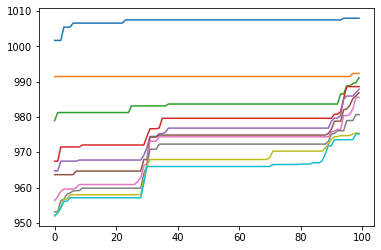

In [43]:
import matplotlib.pyplot as plt
import numpy as np
    
for i in range(len(y_plot_list)):
    plt.plot(x_plot_list, y_plot_list[i])

plt.show()

In [44]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 39820.45272088051 seconds ---


In [45]:
import pickle

with open('rao_output-6-40', 'wb') as fp:
    pickle.dump(result, fp)
with open('rao_xplot-6-40', 'wb') as fp:
    pickle.dump(x_plot_list, fp)
with open('rao_yplot-6-40', 'wb') as fp:
    pickle.dump(y_plot_list, fp)

In [46]:
with open('rao_output-6-40', 'rb') as fp:
    read_result = pickle.load(fp)
    
print(read_result)

[[0, 20, Timestamp('2020-11-20 16:06:59+0000', tz='UTC'), Timestamp('2020-11-21 05:40:59+0000', tz='UTC'), 47, 0.133], [1, 23, Timestamp('2020-11-20 18:24:12+0000', tz='UTC'), Timestamp('2020-11-21 07:45:14+0000', tz='UTC'), 63, 0.133], [2, 12, Timestamp('2020-11-20 16:13:20+0000', tz='UTC'), Timestamp('2020-11-21 05:09:18+0000', tz='UTC'), 63, 0.133], [3, 39, Timestamp('2020-11-20 18:27:55+0000', tz='UTC'), Timestamp('2020-11-21 06:57:55+0000', tz='UTC'), 29, 0.133], [4, 32, Timestamp('2020-11-20 17:48:48+0000', tz='UTC'), Timestamp('2020-11-21 03:40:12+0000', tz='UTC'), 30, 0.14], [5, 18, Timestamp('2020-11-20 19:24:04+0000', tz='UTC'), Timestamp('2020-11-21 02:27:31+0000', tz='UTC'), 71, 0.171], [6, 1, Timestamp('2020-11-20 18:54:04+0000', tz='UTC'), Timestamp('2020-11-21 01:49:29+0000', tz='UTC'), 60, 0.171], [7, 16, Timestamp('2020-11-20 20:02:05+0000', tz='UTC'), Timestamp('2020-11-21 04:34:48+0000', tz='UTC'), 53, 0.128], [8, 25, Timestamp('2020-11-20 21:01:38+0000', tz='UTC'), 

In [47]:
with open('rao_yplot-6-40', 'rb') as fp:
    read_yplot = pickle.load(fp)
    
print(read_yplot)

[[1001.6921729419882, 1001.6921729419882, 1001.6921729419882, 1005.4564972841364, 1005.4578323139873, 1005.4578323139873, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1006.5873154919733, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803, 1007.4879189957803

In [48]:
with open('rao_output-6-40', 'rb') as fp:
    read_result = pickle.load(fp)
    print(countFitness(read_result))
    
# print(read_result)

[1007.9645022514032, 5449, 63514857.01789938, 37]
